**Introduction**<br>
In this project, we employ several machine learning algorithms to build models that distinguish between genuine and counterfeit banknotes. We will analyze these algorithms to choose the best candidate, and then try to further optimize the algorithm to best model the data. Our goal with this implementation is to accurately predict whether a currency note is genuine or fake. This sort of analysis is needed, since every major economy is flooded with counterfeit notes.

In [3]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv("fake currency prediction.csv")

In [5]:
df.head()

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
df.shape

(1372, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   Target    1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
Target      0
dtype: int64

In [9]:
df.describe()

,variance,skewness,curtosis,entropy,Target
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


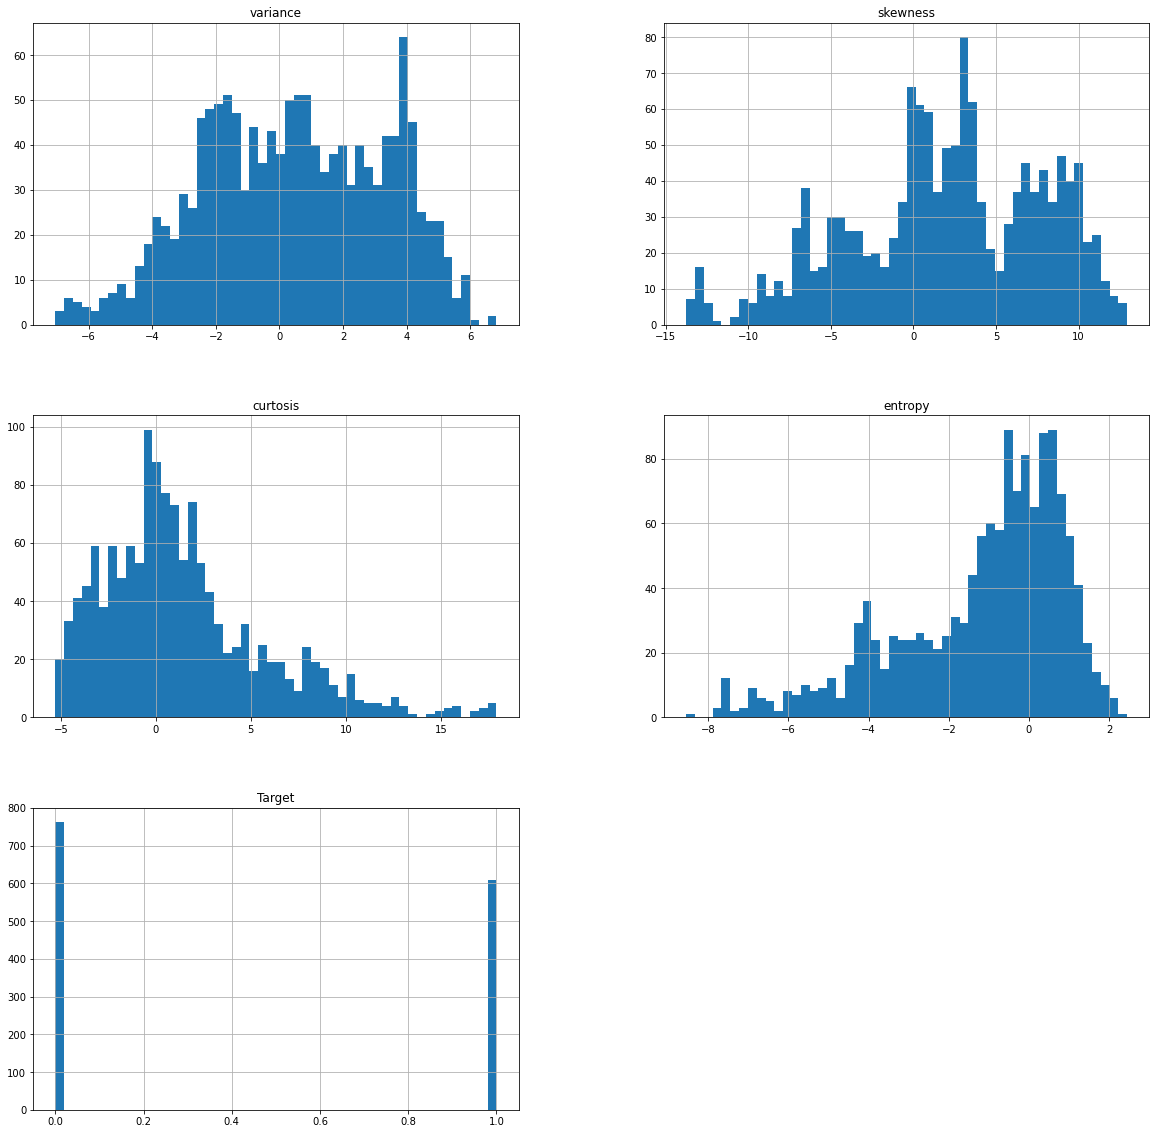

In [10]:
df.hist(bins=50, figsize=(20,20))
plt.show()

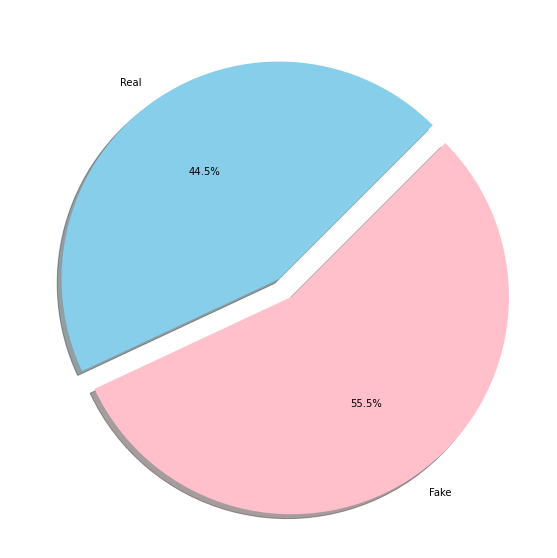

In [11]:
fig=plt.figure(figsize=(10,10))
colors=["skyblue",'pink']
pos=df[df['Target']==1]
neg=df[df['Target']==0]
ck=[pos['Target'].count(),neg['Target'].count()]
legpie=plt.pie(ck,labels=["Real","Fake"], autopct ='%1.1f%%', shadow = True, colors = colors, startangle = 45, explode=(0, 0.1))

In [12]:
X = df.drop(['Target'], axis=1)
Y = np.asarray(df['Target'])

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [14]:
for i in (X_train, Y_train, X_test, Y_test):
    print(i.shape)

(1097, 4)
(1097,)
(275, 4)
(275,)


Random Forest Regressor

In [15]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
Y_Pred = model.predict(X_test)

In [17]:
cm=metrics.confusion_matrix(Y_test,Y_Pred)
print(cm)

[[155   2]
 [  1 117]]


In [18]:
TP = 155
FP = 2
FN = 2
TN = 116

Accuracy = (TP + TN) / (TP + TN + FP + FN)
Precision = TP / (TP + FP) 
Recall = TP / (TP + FN)
F1_Score = 2*(Precision * Recall)/(Precision + Recall)

In [19]:
Accuracy

0.9854545454545455

In [20]:
Precision

0.9872611464968153

In [21]:
Recall

0.9872611464968153

In [22]:
F1_Score

0.9872611464968153

In [23]:
import pickle
pickle_out = open("model.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()